In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

**Context**

Welcome to the Scaler Healthcare data analysis team! As part of our ongoing efforts to understand and combat obesity globally, we're leveraging data to gain insights into factors contributing to obesity. You've been tasked with analyzing the Obesity Dataset, applying the k-Nearest Neighbors (kNN) algorithm to predict obesity levels based on individuals' eating habits and physical conditions.


**Dataset Description**

The dataset you'll be working with contains attributes related to individuals' eating habits and physical conditions. Here's a breakdown of the features you'll encounter:

**Eating Habits Attributes**:

- FAVC (Frequent consumption of high caloric food): Indicates if the individual frequently eats high caloric food.
- FCVC (Frequency of consumption of vegetables): Reflects how often the individual consumes vegetables.
- NCP (Number of main meals): Represents the number of main meals the individual has in a day.
- CAEC (Consumption of food between meals): Shows how frequently the individual eats between meals.
- CH20 (Consumption of water daily): Details the daily water consumption.
- CALC (Consumption of alcohol): Provides information on the individual's alcohol consumption.

**Physical Condition Attributes**:
- SCC (Calories consumption monitoring): Indicates if the individual monitors their calorie intake.
- FAF (Physical activity frequency): Reflects the frequency of physical activity.
- TUE (Time using technology devices): Denotes the time spent using technology devices.
- MTRANS (Transportation used): Details the primary mode of transportation.

In [3]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
numeric = df.select_dtypes(include='number').columns
categorical = df.select_dtypes(exclude='number').columns

In [15]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
df_encoded = pd.DataFrame() 
for col in categorical : 
    df[col]  = en.fit_transform(df[col])

In [31]:
y = df.loc[:, 'NObeyesdad']
X = df.loc[:, df.columns != 'NObeyesdad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1414, 16), (697, 16), (1414,), (697,))

In [44]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
knn.score(X_test_scaled, y_test)

0.8192252510760402

Text(0, 0.5, 'Accuracy')

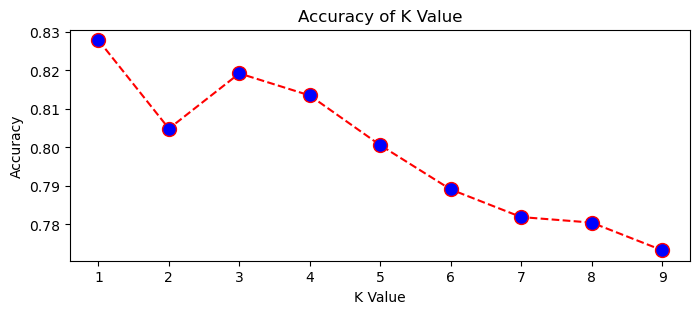

In [49]:
acc= []
k_max = 10
for k in range(1, k_max):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc.append(knn.score(X_test_scaled, y_test))
    
plt.figure(figsize=(8, 3))
plt.plot(range(1, k_max), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')  

### Q3. kNN-DistanceMetrics

In [53]:
distances  = ['euclidean', 'manhattan', 'cosine']
acc = []
for distance in distances:
    knn = KNeighborsClassifier(n_neighbors=3, metric=distance)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc.append(knn.score(X_test_scaled, y_test))
    
acc 

[0.8192252510760402, 0.8794835007173601, 0.8192252510760402]

Text(0, 0.5, 'Accuracy')

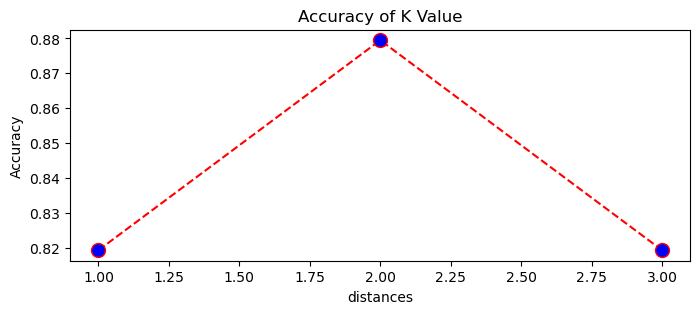

In [55]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 4), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('distances')
plt.ylabel('Accuracy')

In [4]:
en = LabelEncoder()
df_encoded = pd.DataFrame()
for col in categorical:
    df_encoded[col] = en.fit_transform(df[col])

In [5]:
df_encoded.head()
std = StandardScaler()
df_scaled = pd.DataFrame(std.fit_transform(df[numeric]), columns=numeric)
df_en_sca = pd.concat([df_encoded,  df_scaled], axis=1)
df_en_sca.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,2,0,0,3,3,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,0,1,0,2,1,1,2,3,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,1,1,0,2,0,0,1,3,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,1,0,0,2,0,0,1,4,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,1,0,0,2,0,0,2,3,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [6]:
y = df_en_sca['NObeyesdad'] 
X = df_en_sca.drop(columns=['NObeyesdad'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)

In [7]:
acc = []
for k in range (1, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #print(classification_report(y_test, y_pred))
    acc_sc = accuracy_score(y_test, y_pred)
    acc.append(acc_sc)

In [8]:
acc

[0.8436154949784792, 0.830703012912482, 0.8436154949784792, 0.8278335724533716]

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Assume 'df' is your DataFrame

# Apply label encoding
label_encoder = LabelEncoder()
for column in df.select_dtypes('object').columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Print the accuracy
print(knn.score(X_test_scaled, y_test))

0.8192252510760402


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Assume 'df' is your DataFrame
df = pd.read_csv('../data/ObesityDataSet.csv')

# Apply label encoding
label_encoder = LabelEncoder()
for column in df.select_dtypes('object').columns:
    df[column] = label_encoder.fit_transform(df[column])


In [11]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [12]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0, 0.5, 'Accuracy')

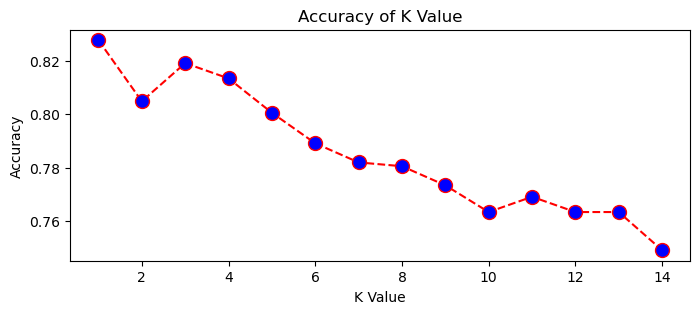

In [56]:
acc_euclidean = []
k_max = 15
metric_ev = 'euclidean'
for i in range(1, k_max):
    knn = KNeighborsClassifier(n_neighbors=i, metric=metric_ev)
    knn.fit(X_train_scaled, y_train)
    a_score = knn.score(X_test_scaled, y_test)
    acc_euclidean.append(a_score)
    
plt.figure(figsize=(8, 3))
plt.plot(range(1, k_max), acc_euclidean, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')  

In [14]:
, Manhattan, and Cosine

('Manhattan,', 'and', 'Cosine')

Text(0, 0.5, 'Accuracy')

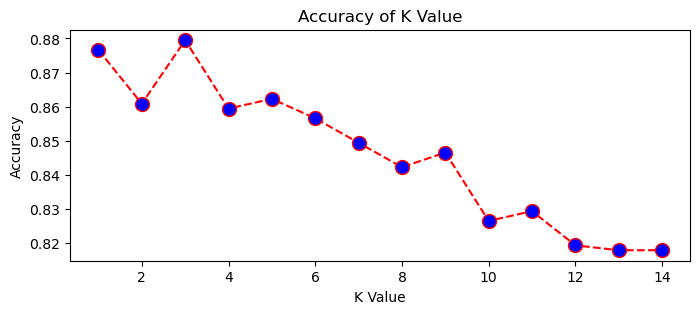

In [57]:
acc_manhattan = []
k_max = 15
metric_ev = 'manhattan'
for i in range(1, k_max):
    knn = KNeighborsClassifier(n_neighbors=i, metric=metric_ev)
    knn.fit(X_train_scaled, y_train)
    a_score = knn.score(X_test_scaled, y_test)
    acc_manhattan.append(a_score)
    
plt.figure(figsize=(8, 3))
plt.plot(range(1, k_max), acc_manhattan, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy') 

Text(0, 0.5, 'Accuracy')

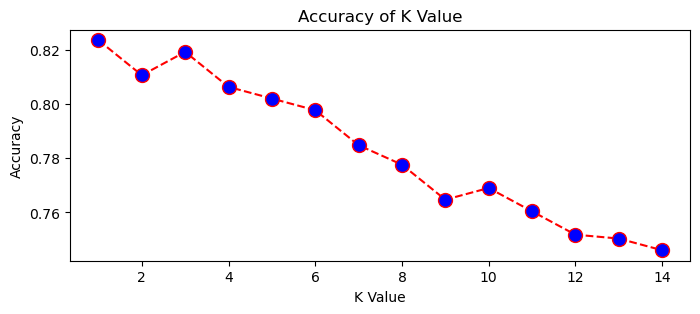

In [58]:
acc_cosine = []
k_max = 15
metric_ev = 'cosine'
for i in range(1, k_max):
    knn = KNeighborsClassifier(n_neighbors=i, metric=metric_ev)
    knn.fit(X_train_scaled, y_train)
    a_score = knn.score(X_test_scaled, y_test)
    acc_cosine.append(a_score)
    
plt.figure(figsize=(8, 3))
plt.plot(range(1, k_max), acc_cosine, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy') 

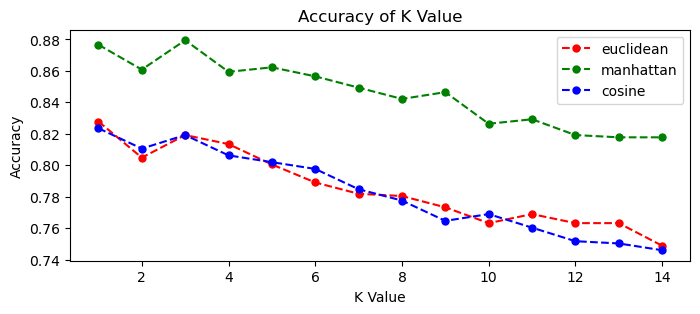

In [59]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, k_max), acc_euclidean, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5, label= 'euclidean')
plt.plot(range(1, k_max), acc_manhattan, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5, label= 'manhattan')
plt.plot(range(1, k_max), acc_cosine, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5, label= 'cosine')
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy') 
plt.legend()

# Q4. Bias-Variance in kNN

In [60]:
acc_training = []
acc_test = []
k_max = 80
metric_ev = 'manhattan'
for i in range(1, k_max):
    knn = KNeighborsClassifier(n_neighbors=i, metric=metric_ev)
    knn.fit(X_train_scaled, y_train)
    acc_training.append(knn.score(X_train_scaled, y_train))
    acc_test.append(knn.score(X_test_scaled, y_test))

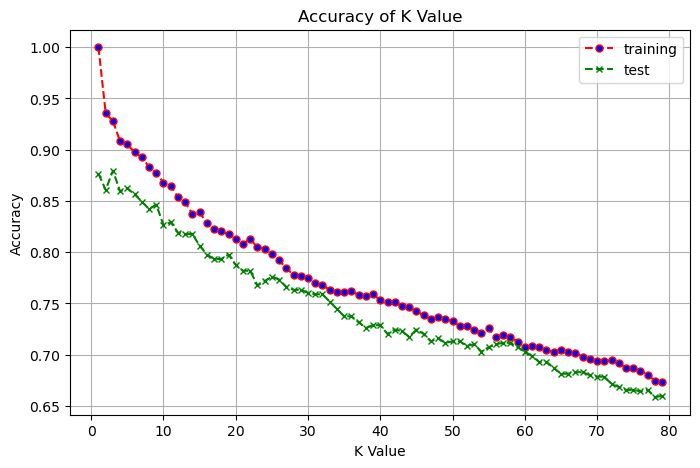

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max), acc_training, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5, label= 'training')
plt.plot(range(1, k_max), acc_test, color='green', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=5, label= 'test')

plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy') 
plt.legend()
plt.grid(True)
plt.show()

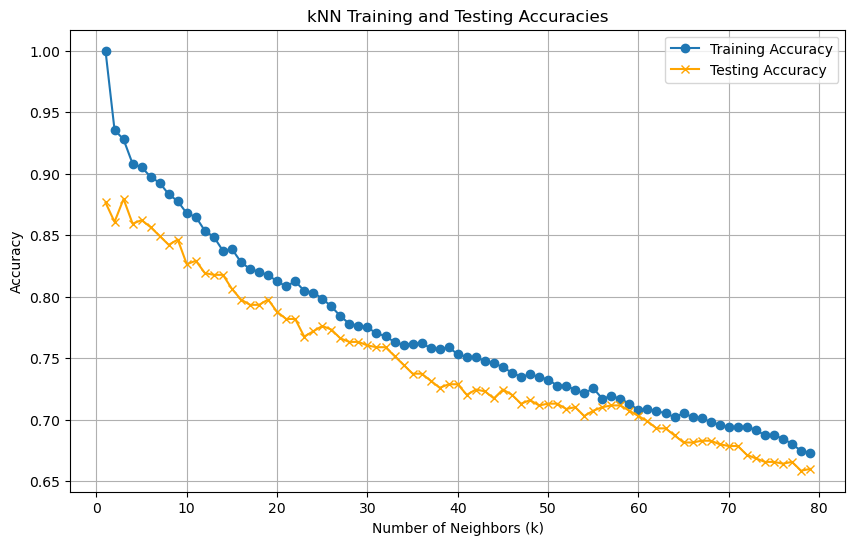

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 80), acc_training, label='Training Accuracy', marker='o')
plt.plot(range(1, 80), acc_test, color='orange', label='Testing Accuracy', marker='x')
plt.title('kNN Training and Testing Accuracies')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Q7. Optimal k for kNN Using CV

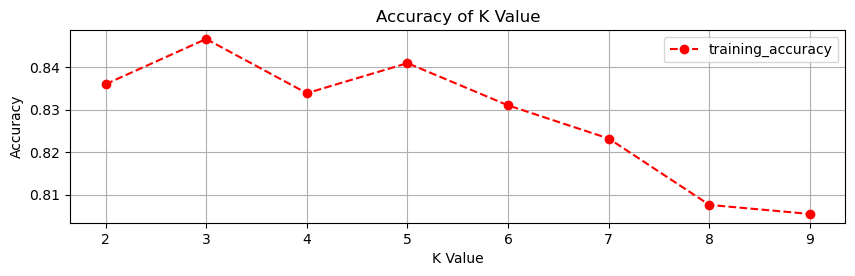

In [77]:
k_values = [i for i in range (2, 10)]
training_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    training_scores.append(score.mean())


plt.figure(figsize=(10, 2.5))
plt.plot(k_values, training_scores, color='red', linestyle='dashed', marker='o', label= 'training_accuracy')
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy') 
plt.legend()
plt.grid(True)
plt.show()

In [66]:
k_values = [i for i in range (2,10)]
traing_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    traing_scores.append(np.mean(score))

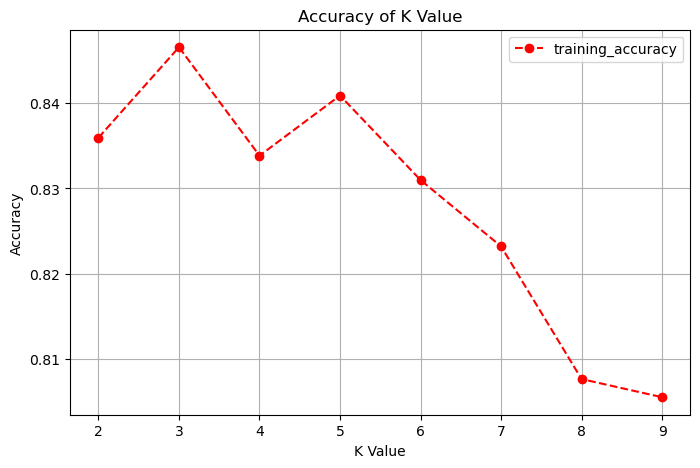

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, traing_scores, color='red', linestyle='dashed', marker='o', label= 'training_accuracy')
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy') 
plt.legend()
plt.grid(True)
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8794835007173601